In [17]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [18]:
dataset = pd.read_csv(r"E:\Machine Learning\datasets\covid19.csv")

In [19]:
dataset.shape

(105, 4)

In [34]:
dataset.head()

,Locations,Total cases,Reported deaths,Discharged cases
0,Mainland China,80703,3098,57333
1,South Korea,7313,50,130
2,Iran,6566,194,2134
3,Itay,5883,233,589
4,Germany,951,0,18


In [23]:
dataset.describe()

,Total cases,Reported deaths,Discharged cases
count,105.000000,105.00000,105.000000
mean,1027.114286,34.87619,580.266667
std,7928.161511,303.27316,5595.944884
min,1.000000,0.00000,0.000000
25%,3.000000,0.00000,0.000000
50%,11.000000,0.00000,0.000000
75%,54.000000,0.00000,3.000000
max,80703.000000,3098.00000,57333.000000


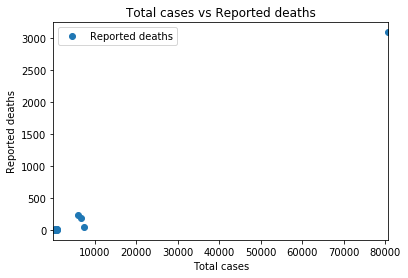

In [21]:
dataset.plot(x='Total cases', y='Reported deaths', style='o')  
plt.title('Total cases vs Reported deaths')  
plt.xlabel('Total cases')  
plt.ylabel('Reported deaths')  
plt.show()

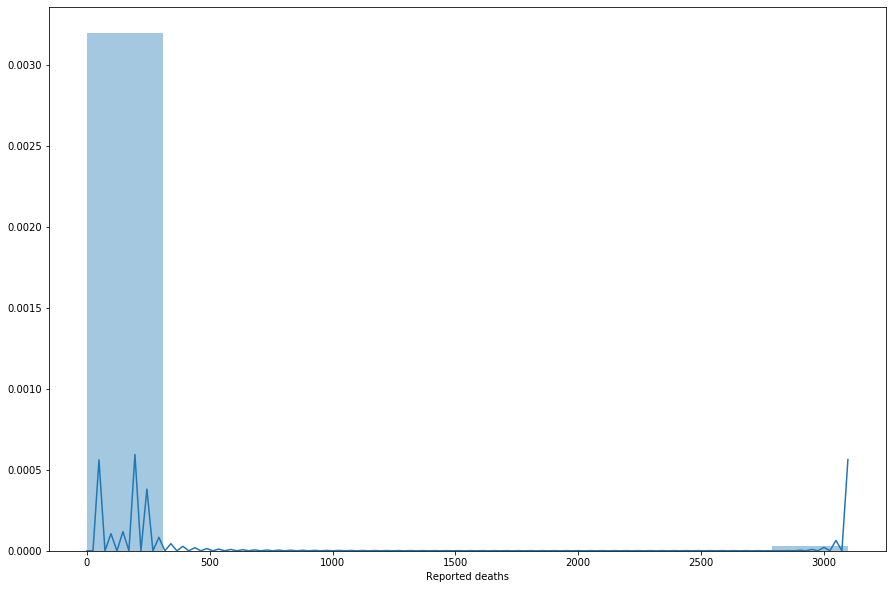

In [24]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Reported deaths'])

In [25]:
X = dataset['Total cases'].values.reshape(-1,1)
y = dataset['Reported deaths'].values.reshape(-1,1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-4.26408542]
[[0.03819074]]


In [29]:
y_pred = regressor.predict(X_test)

In [30]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,4,-2.201786
1,0,-3.996750
2,194,246.496281
3,0,-4.034941
4,0,-4.187704
5,0,-3.729415
6,0,1.464525
7,0,-4.225895
8,1,-3.920369
9,0,-3.653034


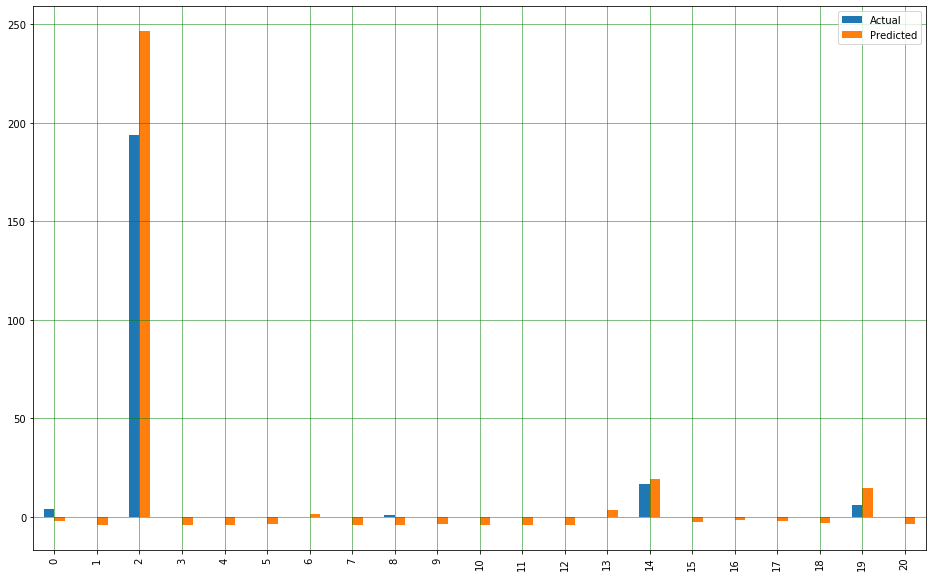

In [31]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

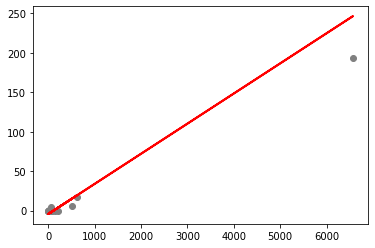

In [32]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.094316213789805
Mean Squared Error: 147.33949149724205
Root Mean Squared Error: 12.13834797232482
